# Notebook to plot figures useful for the comprehension of the case study

In [2]:
from matplotlib.animation import FuncAnimation
from matplotlib.animation import ArtistAnimation
import xarray as xr
import pandas as pd
import numpy as np
from datetime import timedelta, datetime
from parcels import FieldSet, Field, ParticleSet, Variable, JITParticle, AdvectionRK4, Kernel
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt
from IPython.display import HTML

#%matplotlib widget
#%matplotlib inline

### Domain

In [14]:
extent_big = [36.5, 44.5, -1.5, -9.5]
extent_thin = [38.5, 42.5, -2.178355, -8.151151]
real_domain = [37.62, 43.62, -2.178355, -8.151151]
real_domain_plusone = [37.62-1, 43.62+1, -2.178355+1, -8.151151-1]
smaller_domain = [38.5, 42.5, -1.8, -8.2]

### Necessary variables from other Notebooks

Considering to have the following variables available locally

#### Connectivity matrix

In [ ]:
# Considering the connectivity matrix after 7 days for April 1997
connectivity_matrix_7_36x36_array_nan_April97_piscopia = np.load('connectivity_matrix_7_36x36_array_nan_April97_piscopia.npy')
row_sums = np.nansum(connectivity_matrix_7_36x36_array_nan_April97_piscopia, axis=1, keepdims=True)
connectivity_matrix_7_36x36_array_nan_April97_piscopia_perc = (connectivity_matrix_7_36x36_array_nan_April97_piscopia / row_sums) * 100

In [ ]:
# Considering the connectivity matrix after 7 days for April 1998
connectivity_matrix_7_36x36_array_nan_April98_piscopia = np.load('connectivity_matrix_7_36x36_array_nan_April98_piscopia.npy')
row_sums = np.nansum(connectivity_matrix_7_36x36_array_nan_April98_piscopia, axis=1, keepdims=True)
connectivity_matrix_7_36x36_array_nan_April98_piscopia_perc = (connectivity_matrix_7_36x36_array_nan_April98_piscopia / row_sums) * 100

In [ ]:
# Considering the connectivity matrix after 7 days for April 1999
connectivity_matrix_7_36x36_array_nan_April99_piscopia = np.load('connectivity_matrix_7_36x36_array_nan_April99_piscopia.npy')
row_sums = np.nansum(connectivity_matrix_7_36x36_array_nan_April99_piscopia, axis=1, keepdims=True)
connectivity_matrix_7_36x36_array_nan_April99_piscopia_perc = (connectivity_matrix_7_36x36_array_nan_April99_piscopia / row_sums) * 100

#### Corals

In [4]:
# 1133x10 locations of coral spots inside squares created around every 1133 point
random_longitudes = np.load('random_longitudes_11330.npy')
random_latitudes = np.load('random_latitudes_11330.npy')

# The 1133 points inside the domain of the case study, arising from the xataset from Noam paper 
    # (https://github.com/nvogtvincent/WIO_Coral/tree/main/SCRIPTS)
filtered_lon_list = np.load('filtered_lon_list_1133.npy')
filtered_lat_list = np.load('filtered_lat_list_1133.npy')

# Lon and Lat of the grouped spots in the case study domain, with the addition of 4 points,
    # to better represent every part of the domain, particularly around the islands
new_corals_lon = np.array([39.73223114, 39.6405884, 39.500, 39.92, 39.47441864, 39.50928879,
        39.9375    , 39.56, 39.34, 39.26, 39.03000259, 38.9177742 ,
        39.13373184, 39.30393982, 39.60278183, 39.4683342 , 39.18, 39.42,
        38.88454819, 39.01739502, 39.10639954, 39.20000076, 39.26356888,
        39.6333313 , 39.86, 39.88, 39.7731514 , 39.64492798, 39.36883545,
        39.53882599, 39.67703629, 39.89500046, 40.05157852, 40.23666763,
        40.67300415, 40.98210526]) 
new_corals_lat = np.array([-8.01682186, -7.69152546, -7.99, -7.745, -7.48969936, -7.23591518,
        -6.89461374, -6.982, -6.809, -6.594,  -6.45777082, -6.18345165,
        -6.16138983, -6.36267281, -6.37120247, -6.0890007 , -5.877, -5.776,
        -5.79438543, -5.54667282, -5.28294134, -5.02995682, -4.80961895,
        -5.42941427, -5.304, -5.048 , -4.86327362, -5.17221212, -4.68640804,
        -4.43031645, -4.12676477, -3.63475347, -3.35852289, -2.85103106,
        -2.55003238, -2.24830103])

#### Velocities April 1997

In [ ]:
# Considering to have them locally saved, otherwise follow "THESIS Dataset" Notebook
days70_from_april_1997_velocity_u_OK = xr.open_dataset("days70_from_april_1997_velocity_u_OK.nc")
days70_from_april_1997_velocity_v_OK = xr.open_dataset("days70_from_april_1997_velocity_v_OK.nc")

#### WINDS Dataset 2017

In [ ]:
# Following the same approach of "THESIS Dataset" Notebook
    # To represent the bathymetry

base_url = 'https://dap.ceda.ac.uk/thredds/dodsC/bodc/UOX220077/WINDS-M/2017/WINDS-M_SFC_2017.nc'

ds_complete_hh = xr.open_dataset(base_url)
clipped_ds_hh = ds_complete_hh.sel(y_rho=slice(800, 1101), x_rho=slice(150, 451),
                          y_u=slice(800, 1101), x_u=slice(150, 451),
                          y_v=slice(800, 1101), x_v=slice(150, 451))

fifteen_j_ds_hh = clipped_ds_hh.isel(time_counter=slice(0, 721)) 
clipped_velocity = fifteen_j_ds_hh.drop_vars(['s_w','hc','s_rho',
                                 'theta_s','theta_b','Tcline','Vtransform','f','pm','pn','lon_rho','lat_rho',
                                  'angle','mask_rho', 'Cs_r','sc_r','Cs_w','lon_u','lon_v','lat_u', 'lat_v',
                                  'sc_w'])

#### Simulation with OceanParcels

In [11]:
# See "THESIS Simulations" Notebook to have idea of how create a simulation. Here:
# a particle released from each of 32 coral grouped spot, during January 2017 for 7 days,
# with one release per day, output every hour, dt=30min

ds_WINDS_xlsx_Noam_1p_1drel_7d_30m = xr.open_zarr("simulazione_WINDS_xlsx_Noam_1p_1drel_7d_30m.zarr")

## Figures

#### Connectivity matrix April 1997 after 7 days

In [ ]:
plt.figure(figsize=(10, 8))

plt.imshow(connectivity_matrix_7_36x36_array_nan_April97_piscopia_perc, cmap='gist_heat_r',
           interpolation='nearest', aspect='auto', vmax=100, vmin=0)
plt.gca().invert_yaxis()

plt.colorbar(label='Percentage of row sum')
plt.title('Connectivity Matrix April 1997 after 7 days \npercentage for each row', fontsize=18)
plt.xlabel('Sink Coral Reef Locations', fontsize=14)
plt.ylabel('Source Coral Reef Locations', fontsize=14)
plt.grid(which='minor', color='k', linestyle='-', linewidth=0.5)
plt.gca().set_xticks(np.arange(-0.5, 36.5, 1), minor=True)
plt.gca().set_yticks(np.arange(-0.5, 36.5, 1), minor=True)

plt.plot([-0.5, 35.5], [-0.5, 35.5], color='grey', linewidth=1, linestyle='dotted')

Mafia_rows = [0, 4]
for row in Mafia_rows:
    plt.axhline(y=row - 0.5, color='g', linewidth=1.4, linestyle='--')
    plt.axhline(y=row - 0.5, xmin=0/36, xmax=4/36, color='g', linewidth=1.7, linestyle='-')
    plt.axvline(x=row - 0.5, color='g', linewidth=1.4, linestyle='--')
    plt.axvline(x=row - 0.5, ymin=0/36, ymax=4/36, color='g', linewidth=1.7, linestyle='-')

Zanzibar_rows = [12, 18]
for row in Zanzibar_rows:
    plt.axhline(y=row - 0.5, color='b', linewidth=1.4, linestyle='--')
    plt.axhline(y=row - 0.5, xmin=12/36, xmax=18/36, color='b', linewidth=1.7, linestyle='-')
    plt.axvline(x=row - 0.5, color='b', linewidth=1.4, linestyle='--')
    plt.axvline(x=row - 0.5, ymin=12/36, ymax=18/36, color='b', linewidth=1.7, linestyle='-')

Pemba_rows = [23, 28]
for row in Pemba_rows:
    plt.axhline(y=row - 0.5, color='purple', linewidth=1.4, linestyle='--')
    plt.axhline(y=row - 0.5, xmin=23/36, xmax=28/36, color='purple', linewidth=1.7, linestyle='-')
    plt.axvline(x=row - 0.5, color='purple', linewidth=1.4, linestyle='--')
    plt.axvline(x=row - 0.5, ymin=23/36, ymax=28/36, color='purple', linewidth=1.7, linestyle='-')

specific_ticks = [-0.5, 1.6, 6, 14.6, 25, 35.5]
tick_labels = ['S', 'Mafia', 'Offshore', 'Zanzibar', 'Pemba', 'N']

plt.xticks(ticks=specific_ticks, labels=tick_labels, rotation=0)
plt.yticks(ticks=specific_ticks, labels=tick_labels, rotation=0)

ax = plt.gca()
tick_colors = {'S': 'black', 'Mafia': 'g', 'Offshore': 'k', 'Zanzibar': 'b', 'Pemba': 'purple', 'N': 'black'}

for label in ax.get_xticklabels():
    text = label.get_text()
    if text in tick_colors:
        label.set_fontsize(12)
        label.set_color(tick_colors[text])
        if text in ['S', 'N']:
            label.set_fontsize(16)
            label.set_fontweight('bold')

for label in ax.get_yticklabels():
    text = label.get_text()
    if text in tick_colors:
        label.set_fontsize(12)
        label.set_color(tick_colors[text])
        if text in ['S', 'N']:
            label.set_fontsize(16)
            label.set_fontweight('bold')

plt.tight_layout()

#### Comparison between 1997, 1998 and 1998 for April after 7 days

In [ ]:
cmap = 'gist_heat_r'
vmax = 100
vmin = 0
specific_ticks = [-0.5, 1.6, 6, 14.6, 25, 35.5]
tick_labels = ['S', 'Mafia', 'Offshore', 'Zanzibar', 'Pemba', 'N']
tick_colors = {'S': 'black', 'Mafia': 'g', 'Offshore': 'k', 'Zanzibar': 'b', 'Pemba': 'purple', 'N': 'black'}
Mafia_rows = [0, 4]
Zanzibar_rows = [12, 18]
Pemba_rows = [23, 28]

fig, axs = plt.subplots(1, 3, figsize=(30, 8))

def plot_connectivity_matrix(ax, matrix, title):
    im = ax.imshow(matrix, cmap=cmap, interpolation='nearest', aspect='auto', vmax=vmax, vmin=vmin)
    ax.invert_yaxis()
    ax.set_title(title, fontsize=18)
    ax.set_xlabel('Sink Coral Reef Locations', fontsize=14)
    ax.set_ylabel('Source Coral Reef Locations', fontsize=14)
    ax.grid(which='minor', color='k', linestyle='-', linewidth=0.5)
    ax.set_xticks(np.arange(-0.5, 36.5, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, 36.5, 1), minor=True)
    ax.plot([-0.5, 35.5], [-0.5, 35.5], color='grey', linewidth=1, linestyle='dotted')

    for row in Mafia_rows:
        ax.axhline(y=row - 0.5, color='g', linewidth=1.4, linestyle='--')
        ax.axhline(y=row - 0.5, xmin=0/36, xmax=4/36, color='g', linewidth=1.7, linestyle='-')
        ax.axvline(x=row - 0.5, color='g', linewidth=1.4, linestyle='--')
        ax.axvline(x=row - 0.5, ymin=0/36, ymax=4/36, color='g', linewidth=1.7, linestyle='-')

    for row in Zanzibar_rows:
        ax.axhline(y=row - 0.5, color='b', linewidth=1.4, linestyle='--')
        ax.axhline(y=row - 0.5, xmin=12/36, xmax=18/36, color='b', linewidth=1.7, linestyle='-')
        ax.axvline(x=row - 0.5, color='b', linewidth=1.4, linestyle='--')
        ax.axvline(x=row - 0.5, ymin=12/36, ymax=18/36, color='b', linewidth=1.7, linestyle='-')

    for row in Pemba_rows:
        ax.axhline(y=row - 0.5, color='purple', linewidth=1.4, linestyle='--')
        ax.axhline(y=row - 0.5, xmin=23/36, xmax=28/36, color='purple', linewidth=1.7, linestyle='-')
        ax.axvline(x=row - 0.5, color='purple', linewidth=1.4, linestyle='--')
        ax.axvline(x=row - 0.5, ymin=23/36, ymax=28/36, color='purple', linewidth=1.7, linestyle='-')

    ax.set_xticks(ticks=specific_ticks, labels=tick_labels, rotation=0)
    ax.set_yticks(ticks=specific_ticks, labels=tick_labels, rotation=0)

    for label in ax.get_xticklabels():
        text = label.get_text()
        if text in tick_colors:
            label.set_fontsize(12)
            label.set_color(tick_colors[text])
            if text in ['S', 'N']:
                label.set_fontsize(16)
                label.set_fontweight('bold')

    for label in ax.get_yticklabels():
        text = label.get_text()
        if text in tick_colors:
            label.set_fontsize(12)
            label.set_color(tick_colors[text])
            if text in ['S', 'N']:
                label.set_fontsize(16)
                label.set_fontweight('bold')

plot_connectivity_matrix(axs[0], connectivity_matrix_7_36x36_array_nan_April97_piscopia_perc, 'Connectivity Matrix April 1997 after 7 days\npercentage for each row')
plot_connectivity_matrix(axs[1], connectivity_matrix_7_36x36_array_nan_April98_piscopia_perc, 'Connectivity Matrix April 1998 after 7 days\npercentage for each row')
plot_connectivity_matrix(axs[2], connectivity_matrix_7_36x36_array_nan_April99_piscopia_perc, 'Connectivity Matrix April 1999 after 7 days\npercentage for each row')

for ax in axs:
    fig.colorbar(ax.get_images()[0], ax=ax, label='Percentage of row sum')

plt.tight_layout()

#### U Velocity field

In [ ]:
plt.figure(figsize=(10, 8))

ax = plt.axes(projection=ccrs.PlateCarree())

# Invert the y-axis for imshow plot
extent_inverted_y = [days70_from_april_1997_velocity_u_OK.nav_lon_u[0,0], days70_from_april_1997_velocity_u_OK.nav_lon_u[0,-1],
                     days70_from_april_1997_velocity_u_OK.nav_lat_u[0,0], days70_from_april_1997_velocity_u_OK.nav_lat_u[-1,0]]

im = ax.imshow(days70_from_april_1997_velocity_u_OK.u_surf[0,:,:], origin='lower', extent=extent_inverted_y, vmin=-2, vmax=2,
               cmap='BrBG', interpolation='nearest', transform=ccrs.PlateCarree())

# Add coastlines, gridlines and extent
ax.coastlines()
ax.gridlines(draw_labels=True, linestyle='--')
ax.set_extent(extent_thin, crs=ccrs.PlateCarree())

cbar = plt.colorbar(im, ax=ax, orientation='vertical', fraction=0.04, pad=0.05)
cbar.set_label('U velocity $[m/s]$')

plt.title('U velocity $1^{st}$ April 1997', fontsize=18, pad=20)

#### Bathymetry

In [ ]:
# Define the 'Blues' colormap
cmap = plt.cm.Blues

# Function to create a custom colormap with denser lower range
def create_custom_blues_colormap(cmap, transition_value, max_value):
    n = 256  # Number of points in the colormap
    
    # Create a list of colors from the 'Blues' colormap
    colors = cmap(np.linspace(0, 1, n))
    
    # Create a custom scale
    scale = np.concatenate([
        np.linspace(0, transition_value / max_value, int(n * (transition_value / max_value))),
        np.linspace(transition_value / max_value, 1, int(n * (1 - transition_value / max_value)))
    ])
    
    # Create a custom colormap
    new_cmap = LinearSegmentedColormap.from_list('custom_blues', colors[scale.argsort()])
    
    return new_cmap

# Create the custom colormap
transition_value = 100
max_value = 1500
custom_blues_cmap = create_custom_blues_colormap(cmap, transition_value, max_value)

plt.figure(figsize=(10, 10))

ax = plt.axes(projection=ccrs.PlateCarree())

# Invert the y-axis for imshow plot
extent_inverted_y = [clipped_velocity['nav_lon_rho'][0, 0], clipped_velocity['nav_lon_rho'][0, -1],
                     clipped_velocity['nav_lat_rho'][0, 0], clipped_velocity['nav_lat_rho'][-1, 0]]

im = ax.imshow(clipped_velocity['h'], origin='lower', extent=extent_inverted_y,
               cmap=custom_blues_cmap, interpolation='nearest', transform=ccrs.PlateCarree(), vmin=0, vmax=max_value)

ax.coastlines()
ax.gridlines(draw_labels=True, linestyle='--')
ax.set_extent(extent_thin, crs=ccrs.PlateCarree())

cbar = plt.colorbar(im, ax=ax, orientation='vertical', fraction=0.04, pad=0.05)
cbar.set_label('Bathymetry $[m]$')

plt.title('Case study bathymetry', fontsize=18, pad=20)

#### Case study Domain

In [ ]:
# Create a figure and axis with the specified projection
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set the extent of the map
ax.set_extent(real_domain_plusone, crs=ccrs.PlateCarree())

# Add CartoDB Positron tiles
cartodb_tiles = cimgt.OSM()
ax.add_image(cartodb_tiles, 8)  # Zoom level 8

# Add Natural Earth coastlines with high resolution
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '10m',
                                           edgecolor='black', linewidth=1, facecolor='none'))

# Add other Natural Earth features if needed (e.g., land, borders, rivers)
#ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.RIVERS)

# Add gridlines and labels
gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.right_labels = False
gl.top_labels = False

# Define the rectangle's bottom-left and top-right corners
rectangle_bottom_left = [real_domain[0], real_domain[2]]
rectangle_width = real_domain[1] - real_domain[0]
rectangle_height = real_domain[3] - real_domain[2]

# Create and add the red rectangle to the plot
rect = Rectangle((rectangle_bottom_left[0], rectangle_bottom_left[1]), rectangle_width, rectangle_height,
                 linewidth=2, edgecolor='red', facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(rect)

ax.text(38.4, -3, 'Kenya', transform=ccrs.PlateCarree(), fontsize=30, color='k')
ax.text(37.17, -7.14, 'Tanzania', transform=ccrs.PlateCarree(), fontsize=30, color='k')
ax.text(40, -8, 'Mafia', transform=ccrs.PlateCarree(), fontsize=24, color='k')
ax.text(39.6, -6, 'Zanzibar', transform=ccrs.PlateCarree(), fontsize=24, color='k')
ax.text(40, -5.18, 'Pemba', transform=ccrs.PlateCarree(), fontsize=24, color='k')
ax.text(40 , -6.94461374, 'Offshore', transform=ccrs.PlateCarree(), fontsize=24, color='k')
ax.scatter(39.9375 , -6.89461374, s=50, transform=ccrs.PlateCarree(), color='darkgreen', marker='*')


# Add a title to the plot
plt.title("Case study domain", fontsize=30, pad=15)

#### Trajectories

Text(0.5, 1.0, 'Simulation of 32 particle trajectories released \n daily for 7 days with dt = 30 minutes')

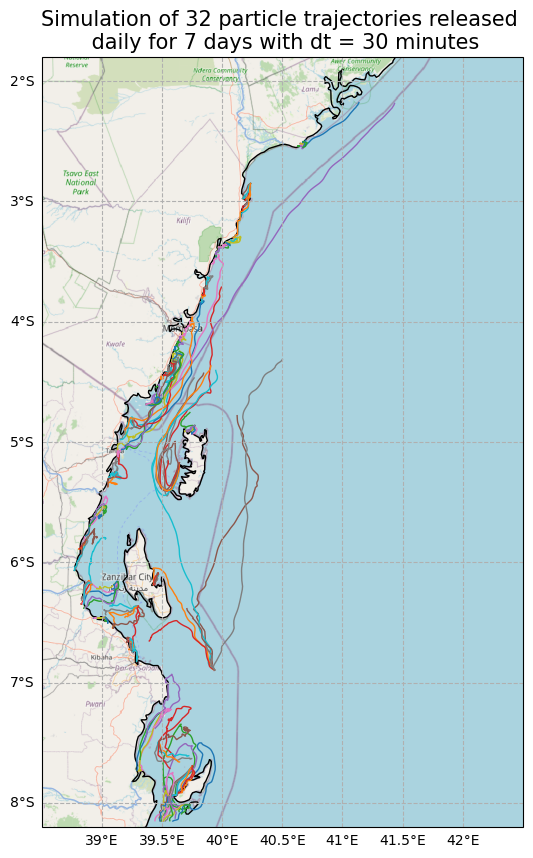

In [17]:
x = ds_WINDS_xlsx_Noam_1p_1drel_7d_30m.lon.values
y = ds_WINDS_xlsx_Noam_1p_1drel_7d_30m.lat.values

# Find the indices where NaN values occur in each particle's trajectory
nan_indices = np.argmax(np.isnan(x), axis=1)

# Truncate the arrays x and y at the indices of the first NaN values
x_truncated = [x[i, :nan_indices[i]] if nan_indices[i] > 0 else x[i] for i in range(len(x))]
y_truncated = [y[i, :nan_indices[i]] if nan_indices[i] > 0 else y[i] for i in range(len(y))]

# Create a figure and axis with the specified projection
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(smaller_domain, crs=ccrs.PlateCarree())

# Add OpenStreetMap tiles
osm_img = cimgt.OSM()
ax.add_image(osm_img, 8)  # Zoom level 8

# Add Natural Earth coastlines with high resolution
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '10m', edgecolor='black', facecolor='none'))

# Add other Natural Earth features if needed (e.g., land, borders, rivers)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.RIVERS)

# Add gridlines and labels
gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.right_labels = False
gl.top_labels = False

for i in range(len(x_truncated)):
    ax.plot(x_truncated[i], y_truncated[i], linewidth=1, transform=ccrs.PlateCarree())

plt.title(f"Simulation of 32 particle trajectories released \n daily for 7 days with dt = 30 minutes", fontsize=15)